In [ ]:
### Importing all the necessary libraries ###

In [1]:
import pandas as pd
import numpy as np

from fbprophet import Prophet

In [2]:
# reading the dataframe.

In [8]:
df = pd.read_csv(r"C:\Users\Sheikh Nabil\Anaconda\Desktop\Capital bikeshare\Week 4\facebook prophet\facebook prophet timeseries\data_fbprophet.csv")

In [9]:
# The imported dataframe looks like this 

In [10]:
df

,Unnamed: 0,date,month,hour,holiday,weekday,Member type,count
0,0,2018-01-01,January,0,No,Monday,Casual,6
1,1,2018-01-01,January,0,No,Monday,Member,28
2,2,2018-01-01,January,1,No,Monday,Casual,11
3,3,2018-01-01,January,1,No,Monday,Member,38
4,4,2018-01-01,January,2,No,Monday,Casual,7
...,...,...,...,...,...,...,...,...
33905,33905,2019-12-31,December,21,No,Tuesday,Member,101
33906,33906,2019-12-31,December,22,No,Tuesday,Casual,9
33907,33907,2019-12-31,December,22,No,Tuesday,Member,71
33908,33908,2019-12-31,December,23,No,Tuesday,Casual,24


In [11]:
# Counting the total number of rwos in the dataframe. 

In [12]:
df['count'].sum()

6941101

In [13]:
# Create new dataframe only with the coumn where date is mentioned and the count of the total rides by dropping all the rest of columns. 

In [14]:
new_df = df.drop(columns=['Unnamed: 0','month','hour','holiday','weekday','Member type'])

In [15]:
# Printed new dataframe

In [16]:
new_df

,date,count
0,2018-01-01,6
1,2018-01-01,28
2,2018-01-01,11
3,2018-01-01,38
4,2018-01-01,7
...,...,...
33905,2019-12-31,101
33906,2019-12-31,9
33907,2019-12-31,71
33908,2019-12-31,24


In [17]:
# Checking the data types of the new dataframe

In [18]:
new_df.dtypes

date     object
count     int64
dtype: object

In [19]:
# Changing the data types to datetime format. 

In [20]:
new_df['date'] = pd.to_datetime(new_df['date'])

In [21]:
# Groupby all the date column to get all the bike counts of that date. s2 is the dataframe with two new comun name 'ds' and 'y' as facebook prophet rules dictates to
# give column name as mentioned. 

In [22]:
s1 = new_df.groupby([ 'date']).sum()
s1
s2 = s1.reset_index()
s2
s2.columns = ['ds','y']
s2



,ds,y
0,2018-01-01,1213
1,2018-01-02,3792
2,2018-01-03,4748
3,2018-01-04,2368
4,2018-01-05,2709
...,...,...
725,2019-12-27,4916
726,2019-12-28,6282
727,2019-12-29,1409
728,2019-12-30,5419


In [23]:
# Prophet follows the sklearn model API. We create an instance of the Prophet class and then call its fit(Prophet.fit) methods.
# The input to Prophet is always a data frame with two columns: ds and y. The ds (date stamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a time stamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [24]:
s2

,ds,y
0,2018-01-01,1213
1,2018-01-02,3792
2,2018-01-03,4748
3,2018-01-04,2368
4,2018-01-05,2709
...,...,...
725,2019-12-27,4916
726,2019-12-28,6282
727,2019-12-29,1409
728,2019-12-30,5419


In [25]:
m = Prophet(interval_width=0.95, yearly_seasonality=True, daily_seasonality=True)
model = m.fit(s2)

In [26]:
# For this moddel we will use the target values for 730 days as training data and predict target for all 90 days.

In [27]:
future = m.make_future_dataframe(periods=90,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,2942.900794,-60.244424,8326.941983,2942.900794,2942.900794,1096.097918,1096.097918,1096.097918,6926.83762,...,-325.870852,-325.870852,-325.870852,-5504.868851,-5504.868851,-5504.868851,0.0,0.0,0.0,4038.998711
1,2018-01-02,2941.898281,403.999956,9179.721225,2941.898281,2941.898281,1718.060978,1718.060978,1718.060978,6926.83762,...,263.230154,263.230154,263.230154,-5472.006797,-5472.006797,-5472.006797,0.0,0.0,0.0,4659.959259
2,2018-01-03,2940.895768,412.952620,9276.247297,2940.895768,2940.895768,2054.672594,2054.672594,2054.672594,6926.83762,...,551.665815,551.665815,551.665815,-5423.830841,-5423.830841,-5423.830841,0.0,0.0,0.0,4995.568362
3,2018-01-04,2939.893255,737.249625,8913.297033,2939.893255,2939.893255,2032.457607,2032.457607,2032.457607,6926.83762,...,467.635477,467.635477,467.635477,-5362.015491,-5362.015491,-5362.015491,0.0,0.0,0.0,4972.350862
4,2018-01-05,2938.890742,785.099453,9236.033748,2938.890742,2938.890742,2082.408797,2082.408797,2082.408797,6926.83762,...,444.036398,444.036398,444.036398,-5288.465221,-5288.465221,-5288.465221,0.0,0.0,0.0,5021.299539


In [28]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,2942.900794,-60.244424,8326.941983,2942.900794,2942.900794,1096.097918,1096.097918,1096.097918,6926.83762,...,-325.870852,-325.870852,-325.870852,-5504.868851,-5504.868851,-5504.868851,0.0,0.0,0.0,4038.998711
1,2018-01-02,2941.898281,403.999956,9179.721225,2941.898281,2941.898281,1718.060978,1718.060978,1718.060978,6926.83762,...,263.230154,263.230154,263.230154,-5472.006797,-5472.006797,-5472.006797,0.0,0.0,0.0,4659.959259
2,2018-01-03,2940.895768,412.952620,9276.247297,2940.895768,2940.895768,2054.672594,2054.672594,2054.672594,6926.83762,...,551.665815,551.665815,551.665815,-5423.830841,-5423.830841,-5423.830841,0.0,0.0,0.0,4995.568362
3,2018-01-04,2939.893255,737.249625,8913.297033,2939.893255,2939.893255,2032.457607,2032.457607,2032.457607,6926.83762,...,467.635477,467.635477,467.635477,-5362.015491,-5362.015491,-5362.015491,0.0,0.0,0.0,4972.350862
4,2018-01-05,2938.890742,785.099453,9236.033748,2938.890742,2938.890742,2082.408797,2082.408797,2082.408797,6926.83762,...,444.036398,444.036398,444.036398,-5288.465221,-5288.465221,-5288.465221,0.0,0.0,0.0,5021.299539


In [29]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
815,2020-03-26,2125.695762,5602.209709,13783.241808,2125.692230,2125.699149,7438.214682,7438.214682,7438.214682,6926.83762,...,467.635477,467.635477,467.635477,43.741585,43.741585,43.741585,0.0,0.0,0.0,9563.910445
816,2020-03-27,2124.693042,5322.191756,13964.587143,2124.689459,2124.696480,7613.261686,7613.261686,7613.261686,6926.83762,...,444.036398,444.036398,444.036398,242.387668,242.387668,242.387668,0.0,0.0,0.0,9737.954729
817,2020-03-28,2123.690323,5638.889733,13878.143923,2123.686685,2123.693817,7439.843217,7439.843217,7439.843217,6926.83762,...,77.824171,77.824171,77.824171,435.181425,435.181425,435.181425,0.0,0.0,0.0,9563.533539
818,2020-03-29,2122.687603,3652.844576,12542.957811,2122.683912,2122.691147,6069.041657,6069.041657,6069.041657,6926.83762,...,-1478.521163,-1478.521163,-1478.521163,620.725200,620.725200,620.725200,0.0,0.0,0.0,8191.729260
819,2020-03-30,2121.684883,5295.098832,13899.626414,2121.681138,2121.688500,7398.736131,7398.736131,7398.736131,6926.83762,...,-325.870852,-325.870852,-325.870852,797.769362,797.769362,797.769362,0.0,0.0,0.0,9520.421013


In [30]:
# Plotting the forecasting presiction for 90 day of 2020.

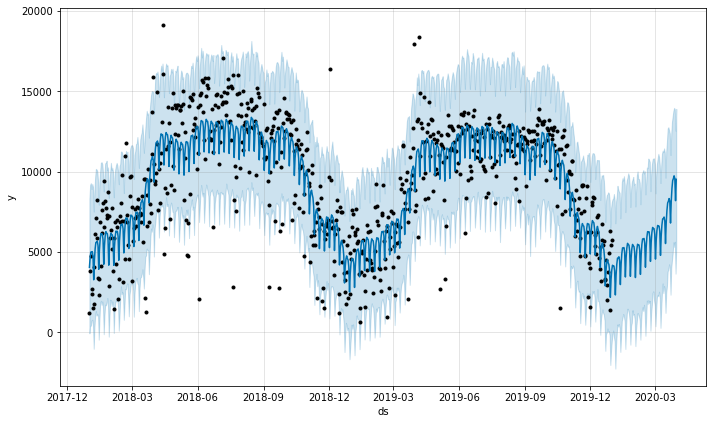

In [31]:
plot1 = m.plot(forecast)

In [32]:
# The daily, weekly and yearly trends are plotted here. 

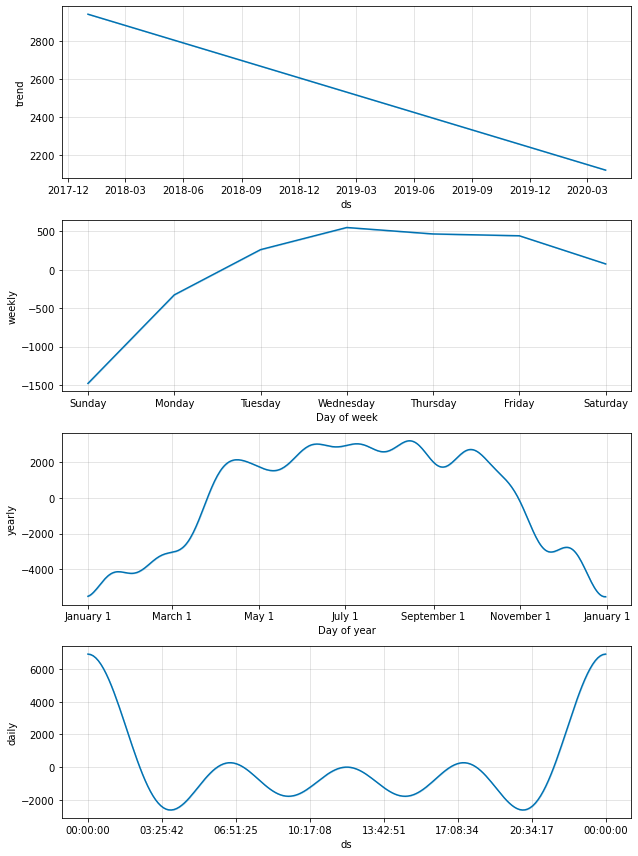

In [33]:
plt2 = m.plot_components(forecast)